# Data Description

Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 


Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls. 

Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

Provide descriptive statistical summaries of the data for each model. 


# Framing Hypothesis

The two samples Current and New are assumed to be taken from the two population (Old and New ) with mu1 and mu2 as there mean.
The population too is assumed to be having a normal distribution.

The Null Hypothesis is mu1 and mu2 are both same i.e mu1 = mu2 . The alternate hypothesis is mu1 != mu2.

Here it is taken as there is no difference in New and Old ball which forms our Null Hypothesis.

In [64]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon,iqr,describe,norm
from statsmodels.stats.power import ttest_power
import pandas as pd

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = pd.read_excel('SM4Golf.xls')

In [20]:
data.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [21]:
data.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


The describe command above shows the basic statistics of the data. It can be infered that the statistics measures like mean, median, IQR,std deviation, min and max are almost same or there is very little difference between the two groups. 

More Over for Current data the mean is almost equal to median which says that the sample is having normal distribution.

In case of New data there is little difference in mean and median.The normalcy of the sample can be test with other statistical test like shapiro.


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000265944701D0>,
      dtype=object)

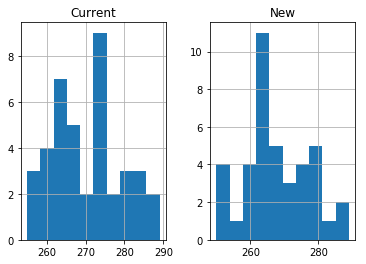

In [23]:
data.hist()

C:\Users\ttc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


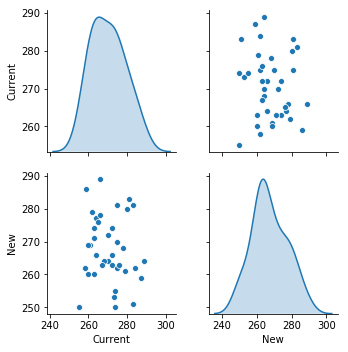

In [47]:
sns.pairplot(data,diag_kind='kde')

From the kernel density plot it can be seen that the samples are having normal distribution..

Further to Strenthen the Normal distribution Shapiro test is used with null hypothesis as the samples are normally distributed . The level of significance (alpha) is 0.05.

If p-value is less than alpha then null hypothesis is rejected and samples are not normally distributed.

If p-value is more than alpha then null hypothesis is accepted and samples are normally distributed.


In [54]:
# The data is divided in two groups one for Old or Current ball (pre) and second for New Ball (post).

pre = data['Current']
post= data['New']

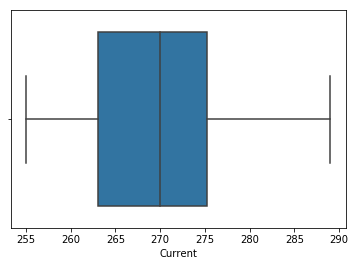

In [129]:
sns.boxplot(pre)


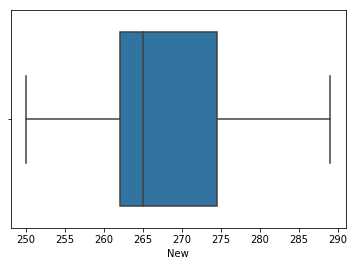

In [128]:
sns.boxplot(post)

In [52]:
shapiro(pre)

(0.9707046747207642, 0.378787100315094)

In [53]:
shapiro(post)

(0.9678263664245605, 0.3064655363559723)

From the Shapiro test for both the groups it can be said that the samples are normally distributed. as p-value is greater than alpha not rejecting our null hypothesis.

In [56]:
# To check for the population variance of two groups Levenes test is used. The null hypothesis is that the variances of the groups are equal.

# The level of significance is default 0.05 which is our alpha.

# If p value is less than alpha null hypothesis is rejected and infers that the two groups are having diffrent variances. 
levene(pre,post)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

 Here the p value is greater than alpha which means population variances are the same for the two groups.

In [55]:
# This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. 
# This test assumes that the populations have identical variances by default.Since previously in levene test it was found 
# that the variances are equal the p-value for ttest_ind should be greater than alpha.

t_statistic, p_value = ttest_ind(pre, post)
print(t_statistic,p_value)

1.3283615935245678 0.18793228491854663


As p value is greater than alpha the null hypothesis is not rejected and that the samples have identical average (expected) values

The t stats is 1.32 

In [59]:
# For non parametric test the two samples are identical as p value is greater than alpha.
mannwhitneyu(pre,post)

MannwhitneyuResult(statistic=668.0, pvalue=0.10265192122893124)

In [58]:
# Pooled Standard Deviation of the groups.
(np.mean(pre) - np.mean(post)) / np.sqrt(((40-1)*np.var(pre) + (40-1)*np.var(post)) / 40+40-2)

0.19431534815781365

In [44]:
# p-value > alpha hence fail to reject null hypothesis.

t_statistic,p_value = ttest_1samp(post-pre,0)
print(t_statistic,p_value)

-1.2769699827911767 0.20916361823147053


In [69]:
# To calculate the hypothesis that the two samples are same :
# H0 : mu1 = mu2
# Ha : mu1 != mu2
# The level of significance taken is 0.05  
# As the sample size is greater than 30 and the samples are normally distributed we can use Z test.
# it is a two tail test as Ha could be > than or < than 

# pre : mean = 270.275 , std = 8.643 , n = 40
# post : mean = 267.50 , std = 9.772 , n = 40

In [73]:
z = scipy.stats.norm.isf(0.05/2)
z

1.9599639845400545

In [79]:
# calculating the estimate standard error

se = np.sqrt((8.643**2/40)+(9.772**2/40))
se

2.062725339205392

In [95]:
# limit within CI
limit = 0 + z*se
limit

4.0428673748407356

In [81]:
np.mean(pre)-np.mean(post)

2.7749999999999773

In [96]:
# calculating p value 
pv = scipy.stats.norm.sf(2.775/se)
pv
# Since P-value is greater than alpha H0 is accepted.

0.08926296604815637

# As the difference between sample means lies with the +-limit we make a conclusion 
# that the samples are same and there is not much difference between the old and current ball

# To test using  pooled estimate :
#  Assuming unkown population variances are equal and
# Taking same H0 and Ha as taken previously

In [160]:
# pooled std
ps = np.sqrt(((40-1)*np.var(pre) + (40-1)*np.var(post)) / 40+40-2)
ps

14.28091000689382

In [89]:
# Std error = Pooled Std * sqrt(1/n1 + 1/n2)

es = ps*np.sqrt((1/40)+(1/40))
es

3.1933085555971568

In [133]:
t_critical_two_tail = scipy.stats.t.isf(.025,78)
t_critical_one_tail = scipy.stats.t.isf(.05,78)
t_critical_two_tail,t_critical_one_tail 

(1.9908470685550523, 1.6646246444385244)

# The mean difference of two samples lies betwee CI limit 5.253 hence null hypothesis is accepted 

In [135]:
# p-value > alpha ( t_value = mean(pre)-mean(post)/se where se = np.sqrt((8.643**2/40)+(9.772**2/40))) as both sample has n = 40 the formula for se can be used.
t_value = 2.775/2.06

p = scipy.stats.t.sf(t_value,78)
t_value,p
# As p greater than alpha the null hypothesis is accepted.Also T_value is less than t critical in this case also H0 accepted

(1.3470873786407767, 0.09092636512017169)

In [153]:
t_value = 2.775/3.193
p = scipy.stats.t.sf(t_value,78)
t_value,p

(0.8690886313811462, 0.1937325444589748)

With pooled std also the p value is greater than the alpha and hence null hypothesis is accepted.

In [155]:
# With .05 signficant level the t value is 1.665 for Df = 40+40-2 
# limit1 for one tail test
limit1 = 0 + 1.665*es
#limit2 for two tail test
limit2 = 0 + 1.990*es
limit1,limit2

(5.316858745069266, 6.354684025638342)

# As in this case also the difference in sample means is within the limit (2.775 < 5.317) so we fail to reject null hypothesis i.e mu1 = mu2 and there is no difference between Current and New Ball

In [152]:
# calculating power for the test : if mean is shifted from 0 to 2.775 the limit 5.317 will have t  value as:
t_stats = (5.317-2.775)/es
t_stats
p = scipy.stats.t.sf(t_stats,78)
t_stats,p

(0.7960395795590883, 0.21421255505162085)

In [143]:
print(ttest_power(0.80, nobs=40, alpha=0.05, alternative="two-sided"))

0.99851935377146


In [102]:
# sample size required for 90 per power with alpha 0.05
10.51 * (3.19/2.775)**2 * (1+1)

27.77717678759841

                        Variable 1	Variable 2
                    Mean	         270.275	267.5
                    Variance	76.61474359	97.94871795
                    Observations	     40	40
                    Pooled Variance	     87.28173077	
       Hypothesized Mean Difference	         0	
                                  df	78	
                    t Stat              1.328361594	
                    P(T<=t) one-tail	0.093966142	
                    t Critical one-tail	1.664624645	
                    P(T<=t) two-tail	0.187932285	
                    t Critical two-tail	1.990847069	

T test calculated in Excel assuming equal population variances which again confirm that there is no difference in means and null hypothesis is accepted

# Conclusion
# To calculate the hypothesis that the two samples are same :
# H0 : mu1 = mu2
# Ha : mu1 != mu2
# The level of significance taken is 0.05  
# As the sample size is greater than 30 and the samples are normally distributed we can use Z test.
# it is a two tail test as Ha could be > than or < than 

# pre : mean = 270.275 , std = 8.643 , n = 40
# post : mean = 267.50 , std = 9.772 , n = 40

The Hypothesis testing is done for the above case with following assumption w.r.t sample size:
    
    1 Sample size is large as it is > 30:
        the p value in this case is 0.089 > 0.05 hence leads to failure in rejecting null hypothesis.
        This is further strenthen with limits as the difference of sample mean lies within the limits (2.775 < 4.04)
    2 Sample size 40 not enough to make conclusion i.e if samples have same mean:
        For this pooled std is calculated and standard error using pooled std is found
        t_value (t_stats) and p value found is 0.87 and 0.39. Here again the p value is greater than alpha 
        hence cannot reject null hypothesis
    3 The sample size required for 90 per power with .05 alpha comes to be 27.77 ~ 28. The sample size in our case is 40
      hence z distribution can be use.
    4 The power of test comes to 21 per with 0.05 alpha and number of observations 40 which says not enough evidence to reject null hypothesis.It means that with 21 percent it can be said that the two samples are different from each other which is very low and not acceptable. 
    
# The advice to Par Inc is since there is enough evidence that the two samples     belongs to populations that have common means and and that there is no difference between the new and current ball it is not advisable to go with the current modification of the ball and needs some more research on doing cut resistance to increase the distance of ball.      